<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [8]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1. Definición del problema: 

El objetivo de este problema es poder predecir el valor medio de las propiedades, dado información sobre su ubicación (longitud, latitud, hogares en la zona, población cercana, etc.) y tamaño (numero de habitaciones, edad de la casa, cantidad de habitantes, etc.). Para esto, se entrenará un modelo de predicción de datos mediante distintos modelos de regresión, y se escogerá el más preciso.

### 2. Estadística descriptiva: 

Podemos obtener un resumen de las principales características de los datos a través de medidas estadísticas, usando el comando ".describe()".

In [9]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 3. Visualización descriptiva:

Podemos visualizar el comportamiento de cada variable y sus correlaciones en los siguientes diagramas. Es importante notar que la variable "target" corresponde al precio objetivo que estimar.


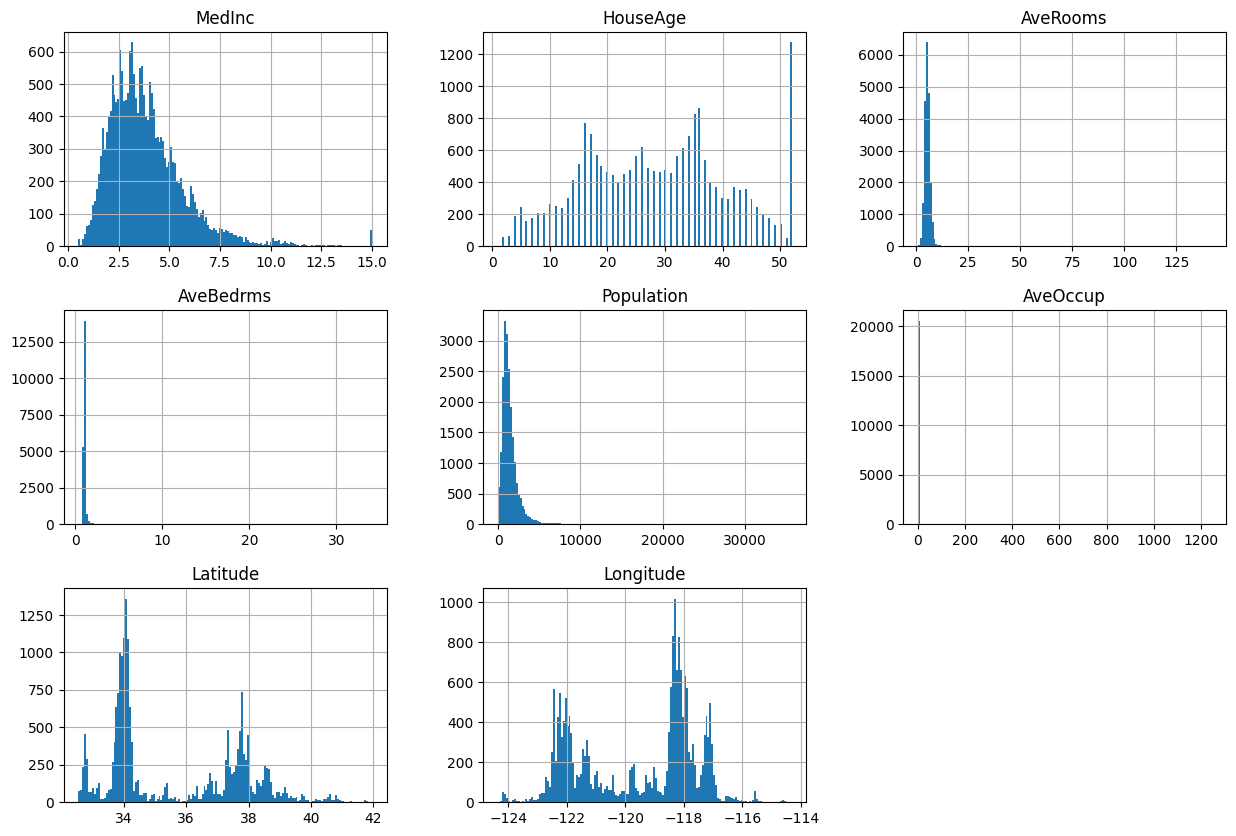

In [116]:
housing.hist(bins = 150,figsize=(15,10))
plt.show()

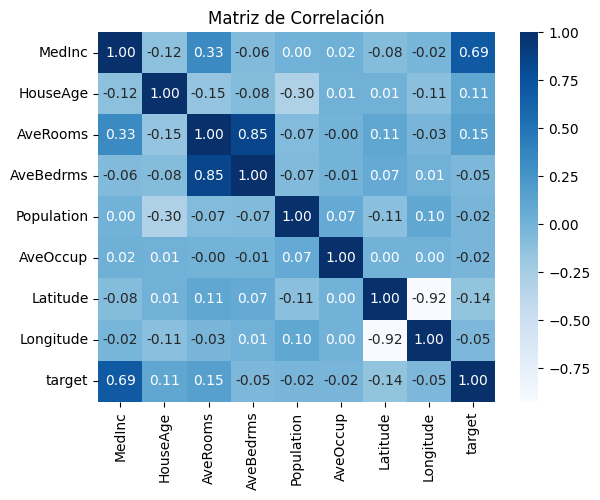

In [23]:
sns.heatmap(housing.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### 4. Preprocesamiento: 

Primero, revisemos si hay datos vacíos dentro del dataframe.

In [65]:
housing.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Como no hay datos nulos del dataframe, podemos preocuparnos de filtrar fuera del dataframe los "outliers". En este caso, consideraremos como "outlier" a cualquier dato que esté a lo más 2 desviaciones estandar de la media. Los datos outliers se marcarán como "NaN" en una copia de la misma dataframe, y podremos ver cuantos datos se filtraron del dataframe original. Es importante recalcar que, como nos interesa comparar la columna de precios promedio "target" con las características de las propiedades, esta columna se dejará intacta.

In [112]:
housing_columns=housing.columns
condition=housing.copy()

for column in housing_columns:
    if column!='target':
        condition[column]=(housing[column]-housing[column].mean())/housing[column].std()
        condition[column]=np.where(condition[column]>2,False,True)
    else:
        condition[column]=True        

condition.shape[0]-condition.sum()

MedInc        851
HouseAge        0
AveRooms      204
AveBedrms     224
Population    756
AveOccup        9
Latitude      429
Longitude      97
target          0
dtype: int64

El listado de arriba muestra cuantos datos de cada columna están fuera de dos desviaciones estandar de la media (sin contar la columna "target"). Ahora, el dataframe preprocesado estará dado por:

In [113]:
housing_filter=housing[condition].dropna().reset_index(drop=True)
housing_filter.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


Y podemos ver la cantidad de filas filtradas fuera de este proceso de la siguiente manera:

In [114]:
housing.shape[0]-housing_filter.shape[0]

2313

### 5. Selección de modelo: 

En este caso, compararemos los cuatro modelos de:

- Regresión lineal
- Árboles de decisión
- Support Vector Regression (SVR)
- Random Forest Regressor

### 6. Métricas y análisis de resultados: 

Vamos a entrenar con una muestra del dataframe a los cuatro modelos mencionados anteriormente. Vamos a considerar una muestra del 25% de los datos de la dataframe preprocesada. La dataframe resultante de este código mostrara algunas métricas de errores relacionados a la regresión de cada modelo.


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

X=housing_filter.drop(columns='target')
y=housing_filter['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1)

#Lineal
reg_lin = LinearRegression()
reg_lin.fit(X_train,y_train)
y_reg_lin = reg_lin.predict(X_test)
metrics_reg_lin = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_reg_lin})).assign(model='linear')

#Decision Tree
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train,y_train)
y_reg_dt = reg_dt.predict(X_test)
metrics_reg_dt = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_reg_dt})).assign(model='decision_tree')

#SVR
reg_svr = SVR()
reg_svr.fit(X_train,y_train)
y_reg_svr = reg_svr.predict(X_test)
metrics_reg_svr = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_reg_svr})).assign(model='svr')

#Random Forest
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)
y_reg_rf = reg_rf.predict(X_test)
metrics_reg_rf = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_reg_rf})).assign(model='random_forest')

reg_df=pd.concat([metrics_reg_lin,metrics_reg_dt,metrics_reg_svr,metrics_reg_rf]).reset_index(drop=True)
reg_df


,mae,mse,rmse,mape,smape,model
0,0.4825,0.4439,0.6662,28.8117,0.4473,linear
1,0.4604,0.5393,0.7344,24.8632,0.3982,decision_tree
2,0.7962,1.1209,1.0587,48.9495,0.6573,svr
3,0.3285,0.2593,0.5093,18.3734,0.3104,random_forest


### 7. Visualización de resultados del modelo: 

Como las regresiones se hacen sobre 8 variables, es dificil visualizar mediante gráficos la relación entre los datos originales y las regresiones (pues las regresiones estarían en 9 dimensiones). Eso sí, la dataframe anterior da una buena idea de que tan buenas son las aproximaciones a los conjuntos de datos originales. Como estas cuantifican el error del modelo, mientras menor valor tengan mejor aproximan a los datos.


### 8. Conclusiones: 

Se puede ver que, en este caso, el modelo "Random Forest" tiene el menor error en todas las categorías de errores para cada modelo. Luego, entre los cuatro modelos entrenados, el modelo "Random Forest" es el que mejor estima el precio promedio de una vivienda dado las características de las propiedades.